### control_soilmod sims

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from palettable.colorbrewer.sequential import YlGn_9

from ideotype.data_process import read_sims, read_data, parse_mature
from ideotype import DATA_PATH

In [13]:
# control_soilmod
#df_sims, df_issues = read_sims('/home/disk/eos8/ach315/upscale/sims/control_soilmod/')
#df_sims.to_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/files/sims_6105_control_soilmod.csv', index=False)
#df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
#    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control_soilmod.yml')
#df_extended, df_stuck = parse_mature(df_all)

In [20]:
# control_soilmod
#df_sims, df_issues = read_sims('/home/disk/eos8/ach315/upscale/sims/control_soilmod2/')
#df_sims.to_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/files/sims_6105_control_soilmod2.csv', index=False)

In [29]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control_soilmod2.yml')
df_extended, df_stuck = parse_mature(df_all)

In [30]:
print(df_matured.shape[0]/df_all.shape[0])
print(df_extended.shape[0]/df_all.shape[0])
print(df_stuck.shape[0]/df_all.shape[0])

0.9836572438162544
0.00441696113074205
0.011925795053003533


In [31]:
soils_all = df_all.groupby('texture').count().year
soils_failed = df_stuck.groupby('texture').count().year
df_soilsinfo = pd.DataFrame({'soils_all': soils_all,
                             'soils_failed': soils_failed})

soils_percent = [np.round((df_soilsinfo.soils_failed[item]/df_soilsinfo.soils_all[item])*100, 2) for item in np.arange(df_soilsinfo.shape[0])]
df_soilsinfo['soils_percent'] = soils_percent
df_soilsinfo

,soils_all,soils_failed,soils_percent
texture,,,
ClLo,160,12.0,7.50
Lo,181,NaN,NaN
LoSa,35,NaN,NaN
SaClLo,45,NaN,NaN
SaLo,572,4.0,0.70
SiCl,91,4.0,4.40
SiClLo,237,6.0,2.53
SiLo,943,1.0,0.11


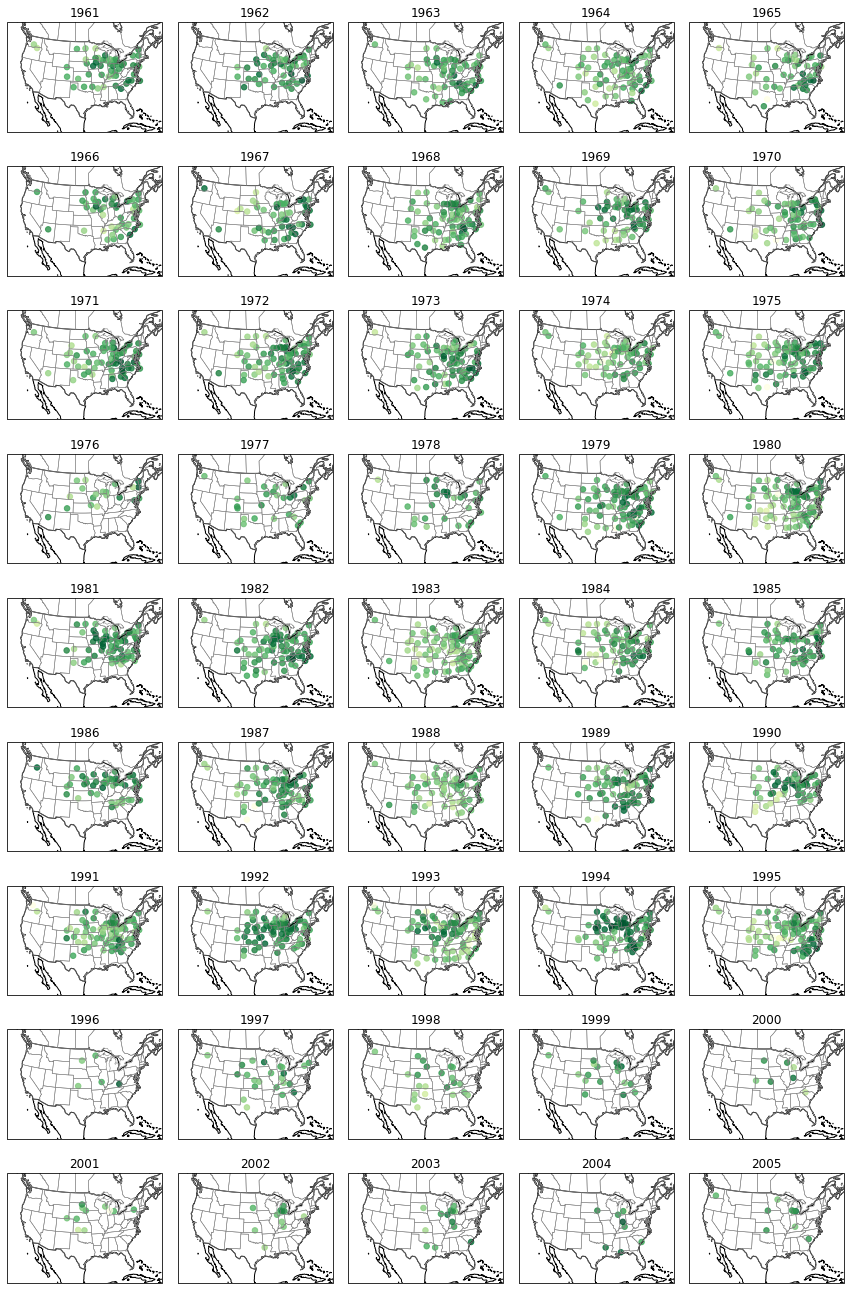

In [24]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    df_sub = df_all[df_all.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, 
               c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap,
               transform=ccrs.PlateCarree(), alpha=0.8, s=30,
               vmin=0, vmax=200) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)

In [17]:
soils_all = df_all.groupby('texture').count().year
soils_failed = df_stuck.groupby('texture').count().year
df_soilsinfo = pd.DataFrame({'soils_all': soils_all,
                             'soils_failed': soils_failed})

soils_percent = [np.round((df_soilsinfo.soils_failed[item]/df_soilsinfo.soils_all[item])*100, 2) for item in np.arange(df_soilsinfo.shape[0])]
df_soilsinfo['soils_percent'] = soils_percent
df_soilsinfo

,soils_all,soils_failed,soils_percent
texture,,,
ClLo,97,95,97.94
Lo,83,64,77.11
LoSa,27,6,22.22
SaClLo,43,22,51.16
SaLo,451,224,49.67
SiCl,35,35,100.00
SiClLo,114,112,98.25
SiLo,707,506,71.57


In [19]:
df_sites.query('site=="724460"')

,site,class,station,state,tzone,lat,lon,years,area,perct_irri,texture
64,724460,1,KANSAS CITY INT'L ARPT,MO,-6,39.3,-94.717,20,10384.2496,0.922852,SiClLo
